  ## next 数组
- 不相等的时候，left左边和right到left是一样的
- 现在为了去找
- **有一个特性，如果知道了left左边的公共前缀位置，那么left左边前缀就等于left右边后缀（left左边等于left右边）**
- **那么就能最大程度保留任然相等的部分，但是相等的部分右边不一定相等，需要再匹配（while）**
- 如果让left简单的直接到最左边，right也需要回退，增加了时间复杂度，不如直接筛除已有的匹配好的模式

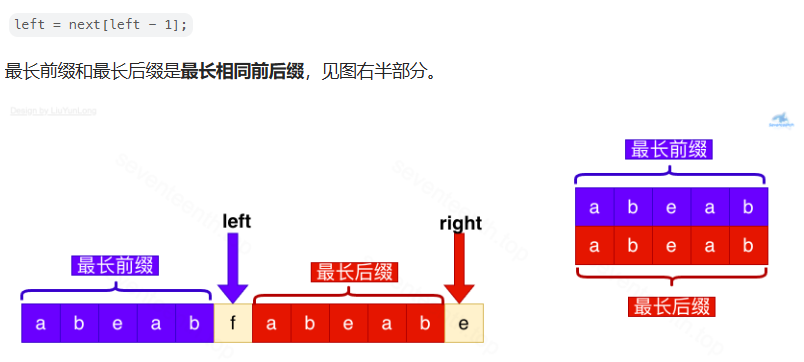

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串的第一个匹配项的下标（下标从 0 开始）。如果 needle 不是 haystack 的一部分，则返回 -1 。

In [7]:
def NextGenerator(pattern):
    size = len(pattern)

    # 先初始化next数组
    nextArray = [0] * size

    left = 0
    # 然后从序号1开始遍历pattern数组
    for right in range(1, size):
        while left > 0 and pattern[right] != pattern[left]:
            left = nextArray[left - 1]
        if pattern[right] == pattern[left]:
            left += 1  # 要先加一，那么记录的就是前缀后面一个，当不相等时跳转就能从前缀后一个开始比较了
            nextArray[right] = left
            
    return nextArray

a = NextGenerator("abeabfabeabe")
a

[0, 0, 0, 1, 2, 0, 1, 2, 3, 4, 5, 3]

In [16]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
        # next数组生成函数
        def NextGenerator(pattern):
            size = len(pattern)

            # 先初始化next数组
            nextArray = [0] * size

            left = 0
            # 然后从序号1开始遍历pattern数组
            for right in range(1, size):
                while left > 0 and pattern[right] != pattern[left]:
                    left = nextArray[left - 1]
                if pattern[right] == pattern[left]:
                    left += 1  # 要先加一，那么记录的就是前缀后面一个，当不相等时跳转就能从前缀后一个开始比较了
                    nextArray[right] = left
                    
            return nextArray
        # KMP算法主函数
        def KMP(pattern, text):
            nextArray = NextGenerator(pattern)
            sizeP = len(pattern)
            sizeT = len(text)

            # 主函数的思想是先匹配，如果不相等了，那么不需要从模式的一开始匹配，而是从公共前缀后面一位开始匹配
            # 因为后缀已经匹配过了，不用管了，直接从nextArray[j - 1]去找就好了
            i, j = 0, 0
            for i in range(sizeT):
                while j > 0 and pattern[j] != text[i]:
                    j = nextArray[j - 1]
                if pattern[j] == text[i]:
                    j += 1
                    if j == sizeP:  # 匹配到了最后一个位置了
                        return  i - j + 1 # i 还没有加一
        
            return -1
        return KMP(needle, haystack)

test = Solution()
test.strStr("sadbutsad", "sad")              

0

纪念一下第一次100%

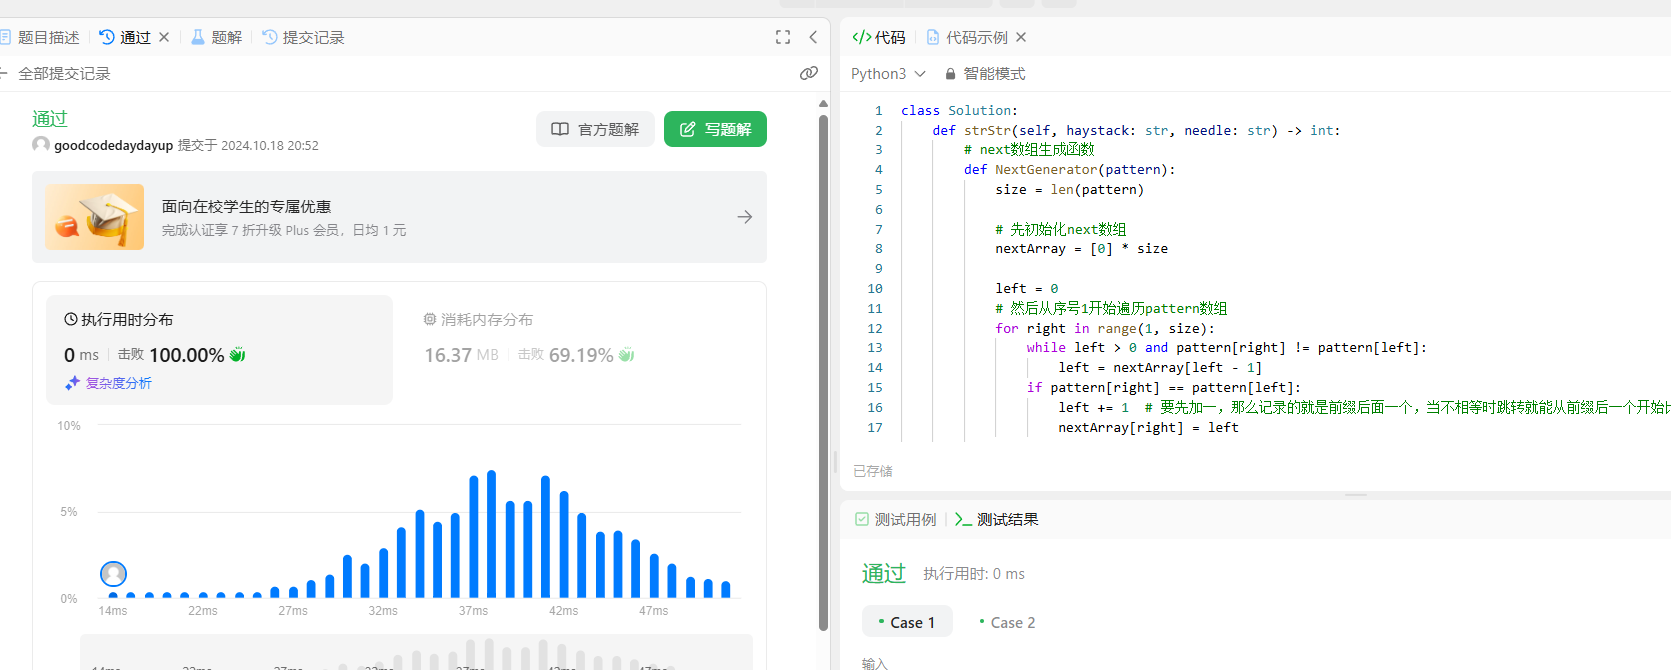